In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

import plot_tools
import utils

import random
import warnings
warnings.filterwarnings('ignore')

First, grab the data (randomly) from the newsgroup data

In [2]:
categories = ['alt.atheism', 'talk.religion.misc',
                       'comp.graphics', 'sci.space']

x = fetch_20newsgroups(categories=categories)
#print(x)
random.seed(17)
y = x.data[random.randrange(len(x.data))]
#print(y.rstrip())
sentances = utils.read_data(y)
#print('#########################')
for line in sentances[:20]:
    print(line)

From: shmuel@mapsut
einstein
com (Shmuel Einstein)Subject: Screen capture -> CYMK converterNntp-Posting-Host: mapsut
einstein
comOrganization: Shmuel Einstein & Associates, Inc
Lines: 20I have a small program to extract a 640x480 image from a vga 16 color screen,and store that image in a TIFF file
I need to insert the image into asales brochure, which I then need printed in 4 color
On a mac, I woulduse Photoshop to separate the image into 5 EPS files, and then pull it intoquark express, then get it printed to film on a lintronix at a service bureau
However, I don't have a mac, but I do have windows
What would I need to do this type of operation in the windows 3
1 environment
Are there anyseparation programs available on the net
Is there a good page layout programthat I should look into
Thanks in advance
-- Shmuel Einstein, shmuel@einstein
comShmuel Einstein & Associates, Inc
9100 Wilshire Blvd, Suite 235 EBeverly Hills, CA  90212310/273-8971 FAX 310/273-8872


Train NMF and LDA models on the document to get topic models

In [3]:
# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
tfidf_vectorizer.tokenizer = utils.tokenizer
tfidf = tfidf_vectorizer.fit_transform(sentances)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
tf_vectorizer.tokenizer = utils.tokenizer
tf = tf_vectorizer.fit_transform(sentances)

# Train the NMF topic model
nmf = NMF(n_components=5, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Train the LDA topic model
lda = LatentDirichletAllocation(n_topics=5, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

Run the summarization with NMF topic model, trained on only the document

In [4]:
#set then number of sentances to return (for all models)
num_out = 5

In [5]:
#Rank sentance importance by number of nouns
summarizer_nmf = utils.TextSummary(nmf, num_out, vectorizer=tfidf_vectorizer, method='nns')
for line in summarizer_nmf.extract_summary(sentances):
    print(line)

On a mac, I woulduse Photoshop to separate the image into 5 EPS files, and then pull it intoquark express, then get it printed to film on a lintronix at a service bureau
Lines: 20I have a small program to extract a 640x480 image from a vga 16 color screen,and store that image in a TIFF file
comOrganization: Shmuel Einstein & Associates, Inc
comShmuel Einstein & Associates, Inc
com (Shmuel Einstein)Subject: Screen capture -> CYMK converterNntp-Posting-Host: mapsut


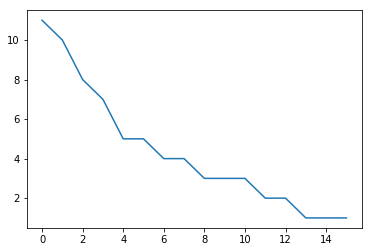

In [6]:
summarizer_nmf.plot_nns()

In [7]:
#Rank sentance importance by total document similarity
summarizer_nmf.method = 'similarity'
for line in summarizer_nmf.extract_summary(sentances):
    print(line)

On a mac, I woulduse Photoshop to separate the image into 5 EPS files, and then pull it intoquark express, then get it printed to film on a lintronix at a service bureau
However, I don't have a mac, but I do have windows
comOrganization: Shmuel Einstein & Associates, Inc
com (Shmuel Einstein)Subject: Screen capture -> CYMK converterNntp-Posting-Host: mapsut
-- Shmuel Einstein, shmuel@einstein


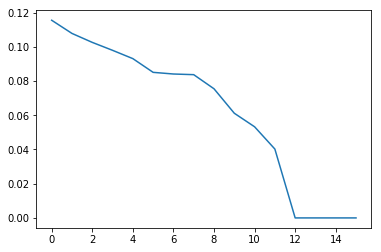

In [8]:
summarizer_nmf.plot_dots()

Run the summarization with LDA topic model, trained on only the document

In [9]:
#Rank sentance importance by number of nouns
summarizer_lda = utils.TextSummary(lda, num_out, vectorizer=tf_vectorizer, method='nns')
for line in summarizer_lda.extract_summary(sentances):
    print(line)

9100 Wilshire Blvd, Suite 235 EBeverly Hills, CA  90212310/273-8971 FAX 310/273-8872
On a mac, I woulduse Photoshop to separate the image into 5 EPS files, and then pull it intoquark express, then get it printed to film on a lintronix at a service bureau
Lines: 20I have a small program to extract a 640x480 image from a vga 16 color screen,and store that image in a TIFF file
I need to insert the image into asales brochure, which I then need printed in 4 color
-- Shmuel Einstein, shmuel@einstein


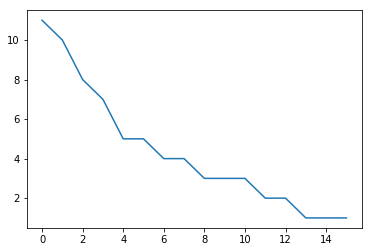

In [10]:
summarizer_lda.plot_nns()

In [11]:
#Rank sentance importance by total document similarity
summarizer_lda.method = 'similarity'
for line in summarizer_lda.extract_summary(sentances):
    print(line)

9100 Wilshire Blvd, Suite 235 EBeverly Hills, CA  90212310/273-8971 FAX 310/273-8872
From: shmuel@mapsut
On a mac, I woulduse Photoshop to separate the image into 5 EPS files, and then pull it intoquark express, then get it printed to film on a lintronix at a service bureau
comOrganization: Shmuel Einstein & Associates, Inc
comShmuel Einstein & Associates, Inc


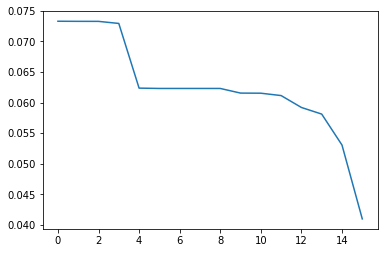

In [12]:
summarizer_lda.plot_dots()

Now lets try the pre-trained doc2vec for topic model sentances

In [13]:
#load the pre-trained doc2vec
doc2vec = utils.load_doc2vec()

#Rank sentance importance by number of nouns
summarizer_d2v = utils.TextSummary(doc2vec, num_out, vectorizer=None, method='nns')
for line in summarizer_d2v.extract_summary(sentances):
    print(line)

From: shmuel@mapsut
On a mac, I woulduse Photoshop to separate the image into 5 EPS files, and then pull it intoquark express, then get it printed to film on a lintronix at a service bureau
comOrganization: Shmuel Einstein & Associates, Inc
comShmuel Einstein & Associates, Inc
-- Shmuel Einstein, shmuel@einstein


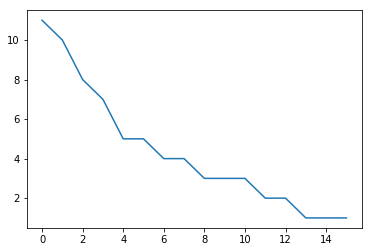

In [14]:
summarizer_d2v.plot_nns()

In [15]:
#Rank sentance importance by total document similarity
summarizer_d2v.method = 'similarity'
for line in summarizer_d2v.extract_summary(sentances):
    print(line)

What would I need to do this type of operation in the windows 3
On a mac, I woulduse Photoshop to separate the image into 5 EPS files, and then pull it intoquark express, then get it printed to film on a lintronix at a service bureau
Lines: 20I have a small program to extract a 640x480 image from a vga 16 color screen,and store that image in a TIFF file
I need to insert the image into asales brochure, which I then need printed in 4 color
com (Shmuel Einstein)Subject: Screen capture -> CYMK converterNntp-Posting-Host: mapsut


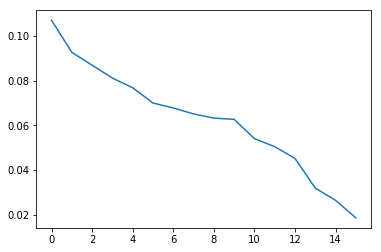

In [16]:
summarizer_d2v.plot_dots()